#**Assignment - 5**

---

<h2>AD616 A4 Enterprise Risk Analytics (Spring 2024)</div>

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


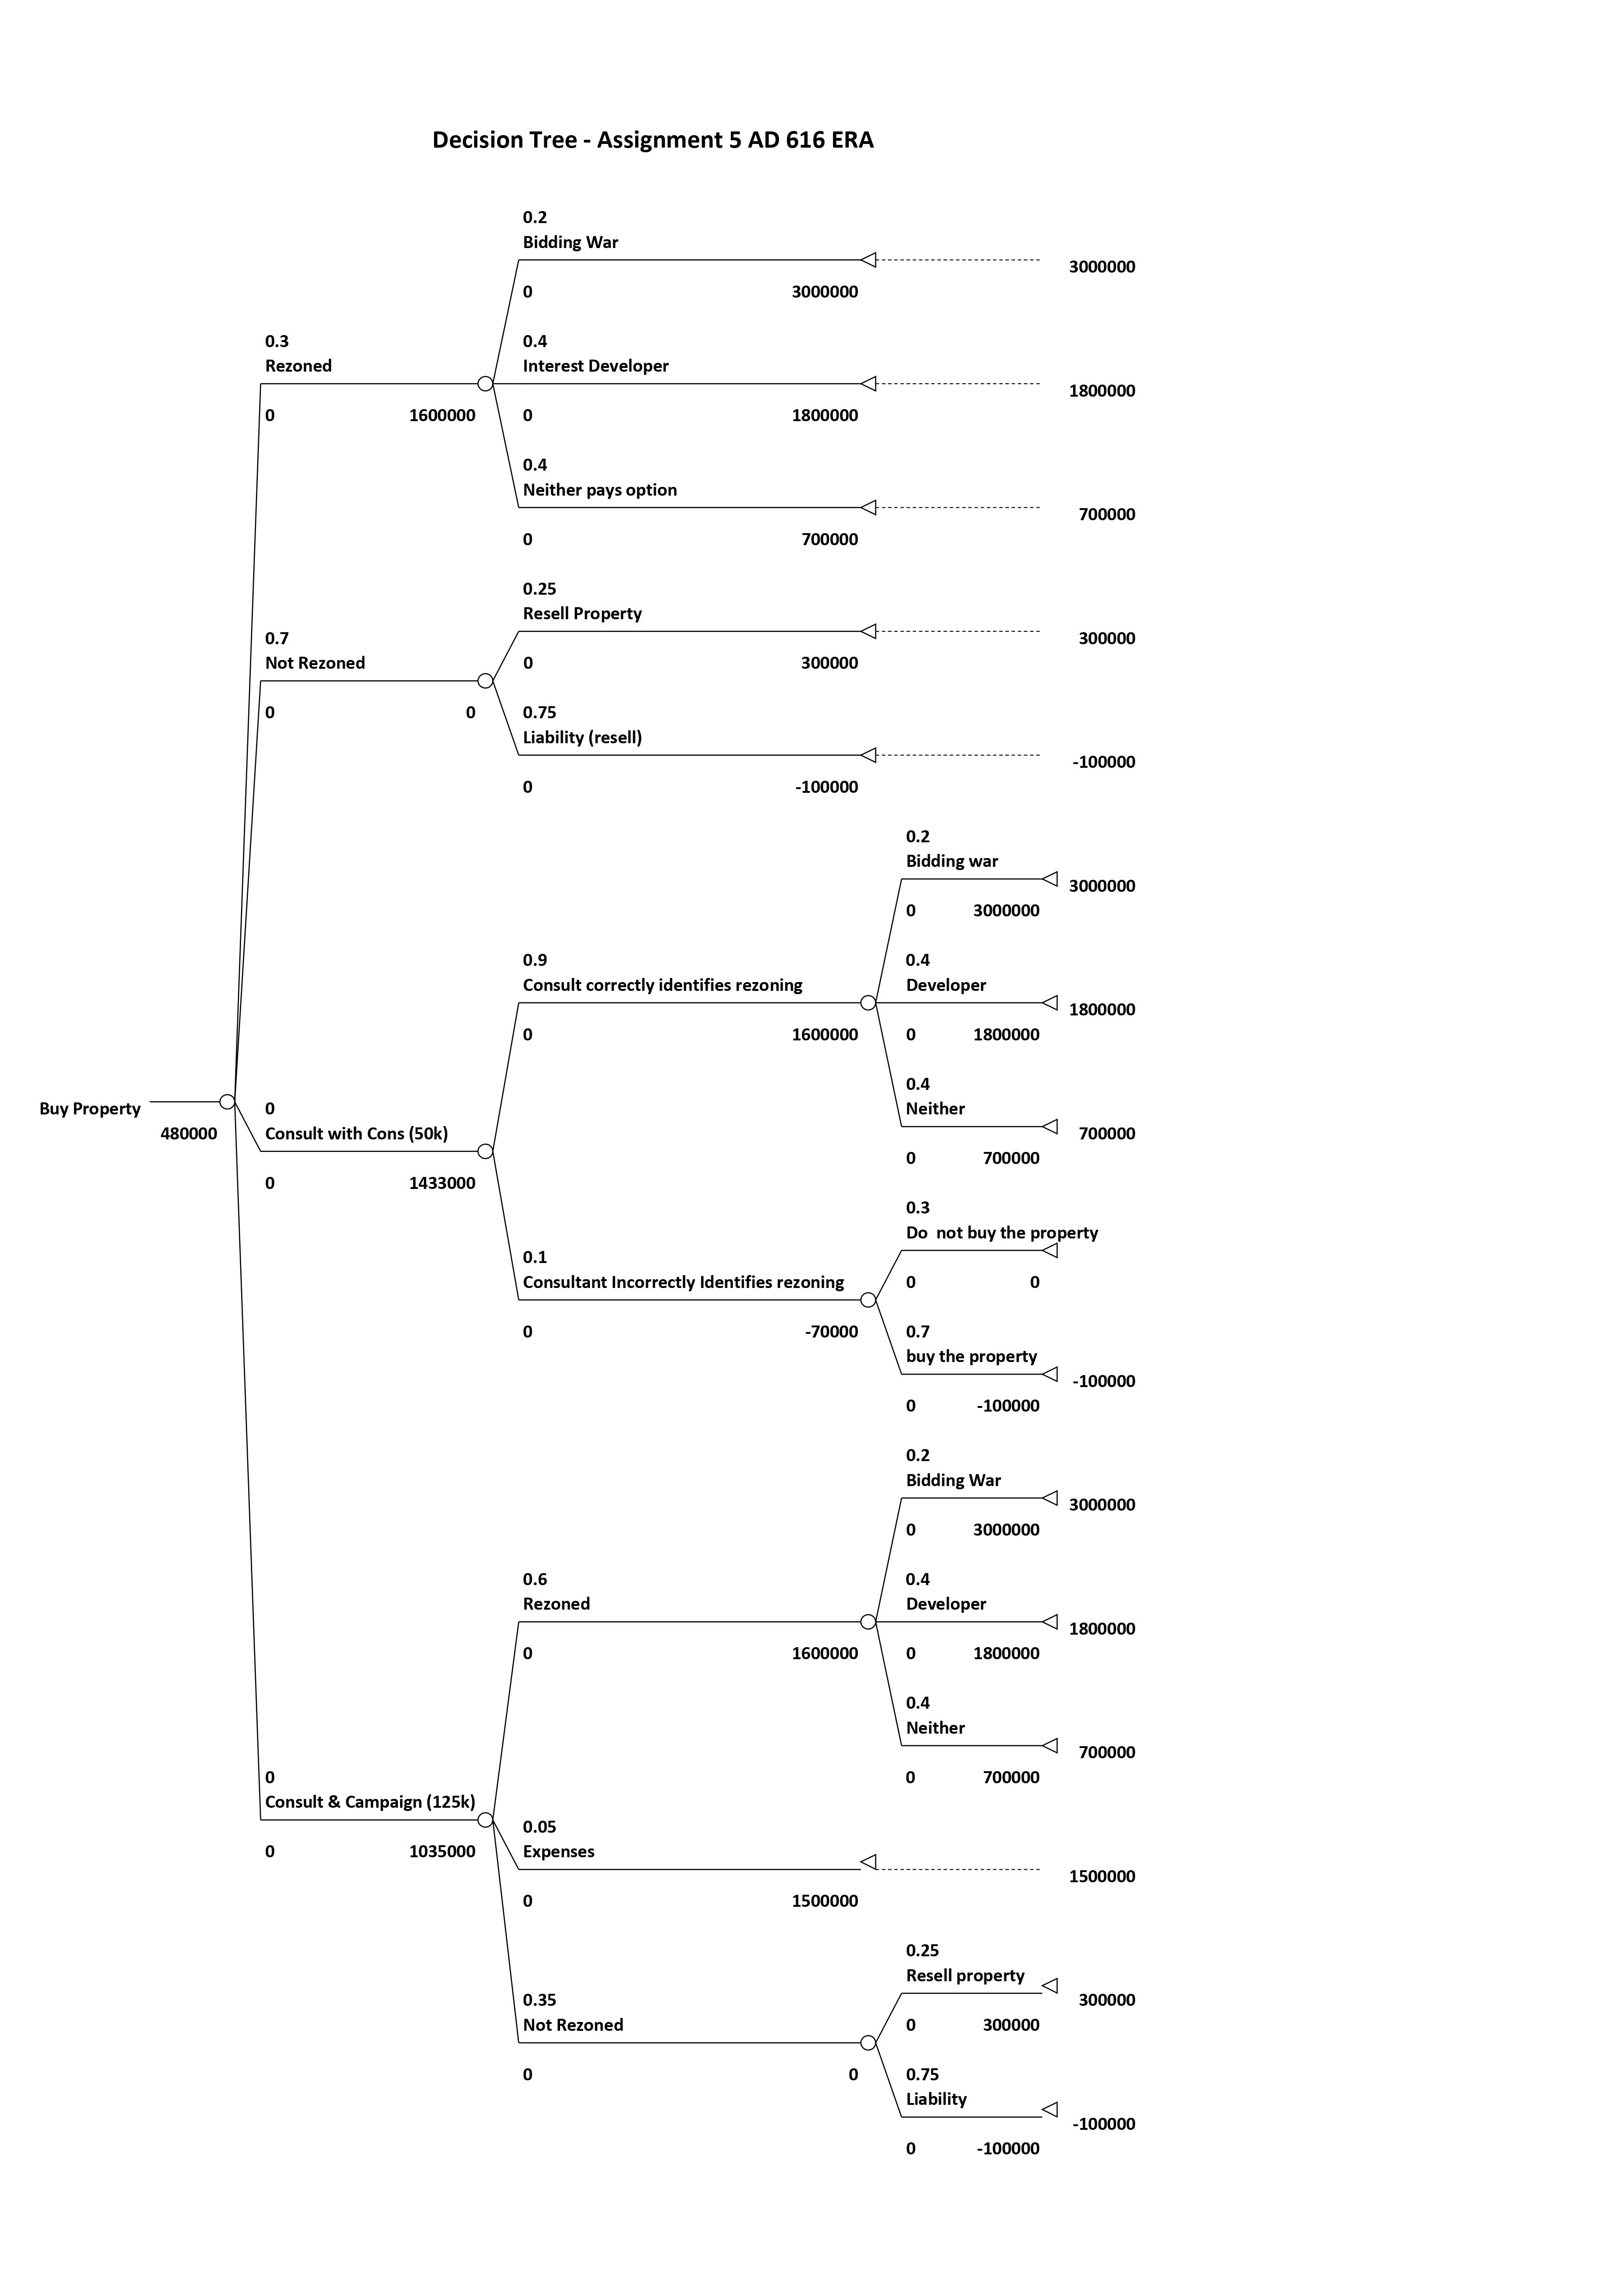

#### **Solution - 1 a]**


The optimal decision under the Expected Monetary Value (EMV) rule is to opt for consultation with a `$50,000` fee, which yields an EMV of `$1,433,000`. This choice offers the highest expected return given the uncertainties involved.

The overall EMV of the entire investment opportunity, considering this optimal decision, is `$1,433,000`. The EMV of the whole property is `$480000`

#### Solution - 1 b]

The value of U(x) for EMV of $1,433,000 and risk tolerance of 2,000,000 using the utility fucntion U(x) = 1-e^(-x/R)


U(1433000) =	1 - e^(-1433000/2000000) =	0.511541126


U(1035000) =	1 - e^(-1035000/2000000) =	0.403991291

U(480000) =	1 - e^(-4800000/2000000)	=	0.213372139


The optimal decision from the conputed EMV would be 0.511541126 (Consultant with a fee of `$50,000`). This choice maximizes the expected return given the calculated probabilities and associated outcomes.

Rearranging the equation:

1 - e^(-x/2000000) =	0.511541126

Subtracting 1 from both sides, we get:

 -e^(-x/2000000) =	-0.488458874


Multiplying both sides by -1 we get:

e^(-x/2000000) =	0.488458874

Next, we can take the natural logarithm (ln) of both sides of the equation:

ln(e^(-x/2000000)) =	ln(0.488458874)

Using the rule ln(e^x) = x, we can simplify the left -hand side of the equation:

-x/2000000 =	ln(0.488458874)

Multiplying both sides by -2000000, we get:

x =	-2000000 * ln(0.488458874)

In excel, we can calculate ln(0.488458874) to be approximatly -0.716499999. Substituting the same in the equation, we get:

x =	-2000000 * (-0.716499999)

x = 1432999.999

Therefore, the certainity equivalent is approximately `$1432999.999`

#### Solution - 1 c]

Expected value of information = EV consultant - without consultant

1433000 - 480000 = 953000


Without considering bribery of government officials, the buyer wouldn't obtain any additional infromation. Consequently, the expected value would be the difference between employing a consultant and not employing one.

#### Solution - 1 d]

Simulation Setup:

The script starts by setting up parameters such as liquidity (initial investment amount), correlation between alternatives, and tax rate.
It also defines a function to draw multivariate normal variates based on the specified correlation matrix.

In [2]:
# Define the mean and standard deviation of each outcome
rezone_bw_mean <- 3
rezone_bw_sd <- 0.6
rezone_sd_mean <- 1.8
rezone_sd_sd <- 0.36
rezone_swout_mean <- 0.7
rezone_swout_sd <- 0.14
fail_resell_mean <- 0.3
fail_resell_sd <- 0.06
fail_unsellable_mean <- 0.1
fail_unsellable_sd <- 0.2
bribery_mean <- 1.5
bribery_sd <- 0.3

In [9]:
# Define the costs
purchase_cost <- 0.4
bribery_cost <- 0.075
consultant_cost <- 0.05

In [10]:
# Define the EMV and loss threshold
desired_emv <- 1.43
loss_threshold <- 0.2
n_simulations <- 10000
loss_probabilities <- vector()

In [11]:
# Calculate the probability of losing at least $200k
for (i in 1:n_simulations) {
  loss_bw <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - bribery_cost - consultant_cost)) + (rezone_bw_mean - 0.5 * rezone_bw_sd^2), mean = rezone_bw_mean, sd = rezone_bw_sd, lower.tail = TRUE)
  loss_sd <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - bribery_cost - consultant_cost)) + (rezone_sd_mean - 0.5 * rezone_sd_sd^2), mean = rezone_sd_mean, sd = rezone_sd_sd, lower.tail = TRUE)
  loss_swout <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - bribery_cost - consultant_cost)) + (rezone_swout_mean - 0.5 * rezone_swout_sd^2), mean = rezone_swout_mean, sd = rezone_swout_sd, lower.tail = TRUE)
  loss_resell <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - consultant_cost)) + (fail_resell_mean - 0.5 * fail_resell_sd^2), mean = fail_resell_mean, sd = fail_resell_sd, lower.tail = TRUE)
  loss_unsellable <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - consultant_cost)) + (fail_unsellable_mean - 0.5 * fail_unsellable_sd^2), mean = fail_unsellable_mean, sd = fail_unsellable_sd, lower.tail = TRUE)
  loss_bribery <- plnorm(q = log(loss_threshold / (bribery_mean - bribery_cost - consultant_cost)), mean = bribery_mean, sd = bribery_sd, lower.tail = TRUE)
  loss_probs <- c(loss_bw, loss_sd, loss_swout, loss_resell, loss_unsellable, loss_bribery)
  loss_probabilities[i] <- sum(loss_probs)
}

total_loss_prob <- sum(loss_probabilities)
total_loss_prob

[1] 0.02689082

 **💡Interpretation💡-**

Therefore, there is a 2.69% chance that the real estate speculator will lose $200,000.

### **Extra Credit**

In [12]:
# Increasing the utility to $2 million
desired_emv <- 1.432999
loss_probabilities2 <- vector()


In [7]:
# Calculate the probability of losing at least $200k
for (i in 1:n_simulations) {
  loss_bw <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - bribery_cost - consultant_cost)) + (rezone_bw_mean - 0.5 * rezone_bw_sd^2), mean = rezone_bw_mean, sd = rezone_bw_sd, lower.tail = TRUE)
  loss_sd <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - bribery_cost - consultant_cost)) + (rezone_sd_mean - 0.5 * rezone_sd_sd^2), mean = rezone_sd_mean, sd = rezone_sd_sd, lower.tail = TRUE)
  loss_swout <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - bribery_cost - consultant_cost)) + (rezone_swout_mean - 0.5 * rezone_swout_sd^2), mean = rezone_swout_mean, sd = rezone_swout_sd, lower.tail = TRUE)
  loss_resell <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - consultant_cost)) + (fail_resell_mean - 0.5 * fail_resell_sd^2), mean = fail_resell_mean, sd = fail_resell_sd, lower.tail = TRUE)
  loss_unsellable <- plnorm(q = log(loss_threshold / (desired_emv - purchase_cost - consultant_cost)) + (fail_unsellable_mean - 0.5 * fail_unsellable_sd^2), mean = fail_unsellable_mean, sd = fail_unsellable_sd, lower.tail = TRUE)
  loss_bribery <- plnorm(q = log(loss_threshold / (bribery_mean - bribery_cost - consultant_cost)), mean = bribery_mean, sd = bribery_sd, lower.tail = TRUE)
  loss_probs <- c(loss_bw, loss_sd, loss_swout, loss_resell, loss_unsellable, loss_bribery)
  loss_probabilities2[i] <- sum(loss_probs)
}

In [8]:
total_loss_prob2 <- sum(loss_probabilities2)
total_loss_prob2

[1] 0.02726495

 **💡Interpretation💡-**

Therefore, there is 2.72% chance that the real estate speculator will lose $200,000.